# Import des bibliothèques

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import des données

In [63]:
df_global = pd.read_csv('data\Ames_houses.csv')
df_global = df_global.sample(n=1460) #on prend n valeurs aléatoires (ici toutes)
df_price_global = df_global[['SalePrice']]
df_global = df_global.drop(['Id', 'SalePrice'], axis=1) #on supprime la colonne Id qui n'apporte aucune information car est unique pour chaque ligne

Analyse des données importées

In [64]:
df_global.shape, df_price_global.shape

((1460, 79), (1460, 1))

In [65]:
df_global.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1326,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal
1371,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,178,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal
526,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
216,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal


# Suppression des colonnes vides

In [66]:
#on créer un dataframe df_vide qui  contient pour chaque colonne le pourcentage de valeurs non renseignées
df_vide = [[nom_colonne, df_global[nom_colonne].isnull().mean() * 100] for nom_colonne in df_global.columns]
df_vide = pd.DataFrame(df_vide, columns=['nom_colonne', 'pourcentage_vide'])
df_vide = df_vide.sort_values(by='pourcentage_vide', ascending=False)

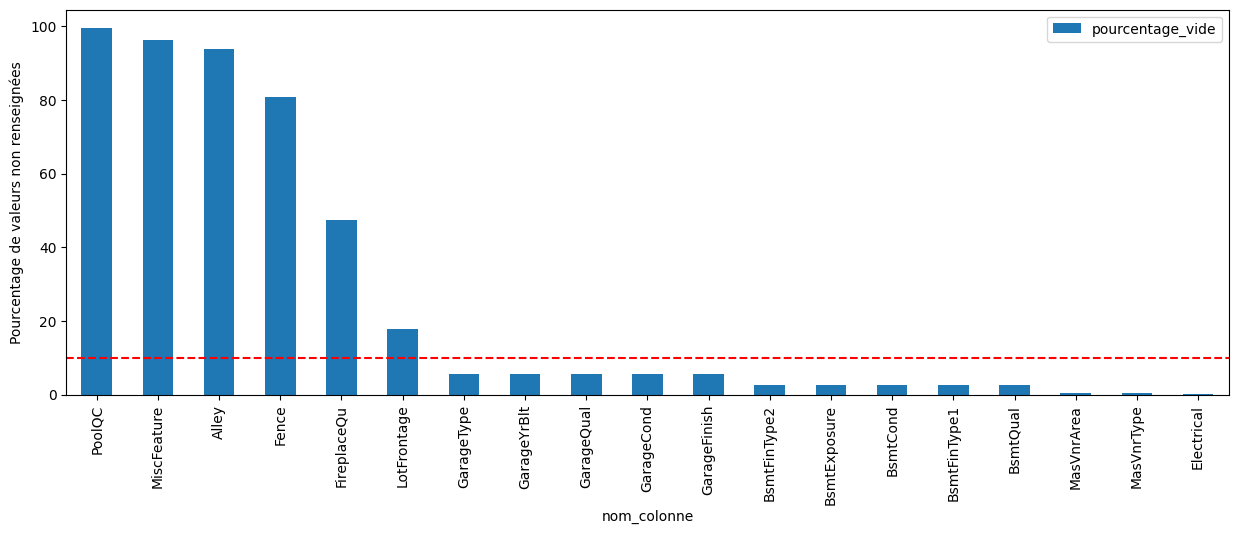

In [67]:
#on affiche graphiquement les colonnes les plus vides
df_vide.loc[df_vide['pourcentage_vide'] > 0.05].plot.bar(x='nom_colonne', y='pourcentage_vide', figsize=(15,5)) #on affiche que celle avec plus de 5% vide
plt.ylabel('Pourcentage de valeurs non renseignées')
plt.axhline(y=10,color='r',linestyle='--') #on trace sur le graphe la limite des 10%
plt.show()

In [68]:
#on supprime les colonnes plus de 10% vides
df_global = df_global.drop(df_vide[df_vide['pourcentage_vide'] > 10]['nom_colonne'], axis=1)

Vérification de la suppression des colonnes

In [69]:
print(df_global.shape)

(1460, 73)


# Remplissage des valeurs manquantes

In [70]:
for nom_colonne in df_global:
    if df_global[nom_colonne].dtype == 'object':
      plus_represente = df_global[nom_colonne].mode().iloc[0] #on met la valeur la plus représentée dans les colonnes catégorielles
      df_global[nom_colonne] = df_global[nom_colonne].fillna(plus_represente)
    else:
      moyenne = df_global[nom_colonne].mean() #on met la valeur la plus représentée dans les colonnes catégorielles
      df_global[nom_colonne] = df_global[nom_colonne].fillna(moyenne)

Vérification du remplissage

In [71]:
#on vérifie ensuite que toutes les colonnes sont bien remplies

df_vide = [[nom_colonne, df_global[nom_colonne].isnull().mean() * 100] for nom_colonne in df_global.columns]
df_vide = pd.DataFrame(df_vide, columns=['nom_colonne', 'pourcentage_vide'])

print(df_vide['pourcentage_vide'].sum())

0.0


# Encodage des colonnes catégorielles

In [72]:
# On applique get_dummies() pour les colonnes catégorielles
df_global = pd.get_dummies(df_global, columns = df_global.select_dtypes(include=['object']).columns)

Vérification du remplissage

In [73]:
df_global.head() #plus de string mais des valeurs binaires

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1326,30,4270,3,6,1931,2006,0.0,544,0,0,...,0,0,0,1,0,0,0,0,1,0
1386,60,16692,7,5,1978,1978,184.0,790,469,133,...,0,0,0,1,0,0,0,0,1,0
1371,80,9600,6,6,1955,1996,0.0,831,0,161,...,0,0,0,1,0,0,0,0,1,0
526,20,13300,5,7,1956,2000,0.0,377,0,551,...,0,0,0,1,0,0,0,0,1,0
216,20,8450,7,5,2004,2004,266.0,946,0,490,...,0,0,0,1,0,0,0,0,1,0


On obtient 269 colonnes au total

# Division des données en jeu d'entrainement et jeu de test

La répartition se fait aléatoirement : deux appels consécutifs ne donnent pas le même résultat

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_global, df_price_global, test_size=0.2) #répartition fixé à 0.8 et 0.2 (choix) 

# Analyse de la corrélation entre les caractéristiques et la variable cible

In [75]:
train_global = pd.concat([X_train, y_train], axis=1) #on réassocie les prix à leurs données X_train

In [76]:
corr = train_global.corr()
nom_colonne = corr[corr['SalePrice']>0.5].index #on supprime les colonnes corrélées à moins de 0.5 avec SalePrice

On vérifie cela graphiquement

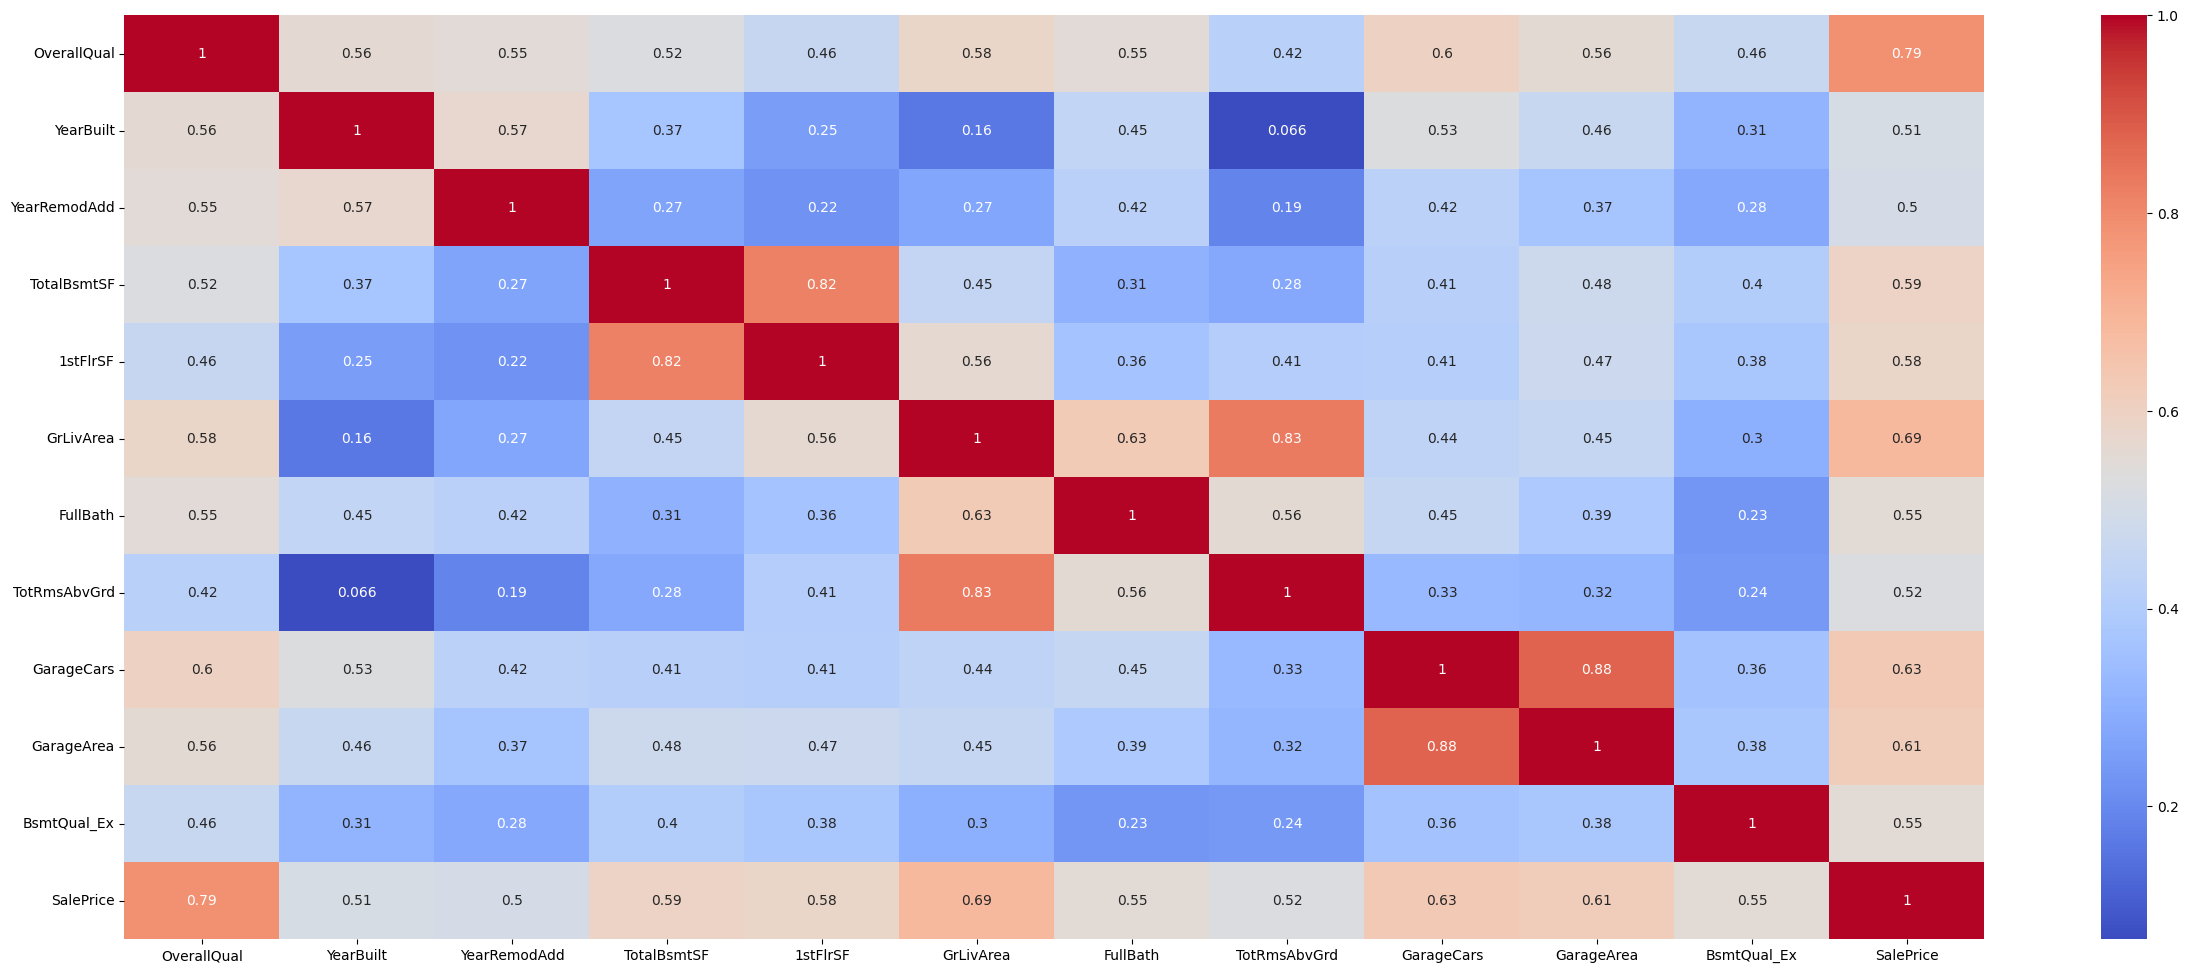

In [77]:
import seaborn as sns

train_global = train_global[nom_colonne]
plt.figure(figsize=(30,12))
sns.heatmap(train_global.corr(), cmap = 'coolwarm', annot=True)
plt.show()

Dans la colonne/ligne SalePrice, toutes les colonnes conservées ont plus de 0.5 comme valeur dans la matrice de corrélation

In [78]:
nom_colonne = nom_colonne.drop(['SalePrice'])
X_train = X_train[nom_colonne]
X_test = X_test[nom_colonne] #on ne conserve que ces colonnes dans les deux jeux de données

In [79]:
nom_colonne

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'BsmtQual_Ex'],
      dtype='object')

# IMPLÉMENTATION DE LA RÉGRESSION


Import des métriques utilisées

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Modèle Linéaire

In [45]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train)
pred_mlr = mlr.predict(X_test)

rmse = np.sqrt(mean_squared_error(pred_mlr, y_test))
mse = mean_squared_error(pred_mlr, y_test)
mae = mean_absolute_error(pred_mlr, y_test)
r2 = r2_score(pred_mlr, y_test)

print(rmse, mse,mae,r2)

27491.607935933134 755788506.9030617 20344.662113938117 0.8394209901964829


Modèle de Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
pred_tr = tr_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(pred_tr, y_test))
mse = mean_squared_error(pred_tr, y_test)
mae = mean_absolute_error(pred_tr, y_test)
r2 = r2_score(pred_tr, y_test)

print(rmse, mse, mae,r2)

34326.4176421577 1178302948.1438355 23532.22602739726 0.7535845530191856


Modèle de Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(rf_pred, y_test))
mse = mean_squared_error(rf_pred, y_test)
mae = mean_absolute_error(rf_pred, y_test)
r2 = r2_score(rf_pred, y_test)

print(rmse, mse, mae,r2)

25572.17904540016 653936341.130003 18285.618970156553 0.8689389120173657


C:\Users\belkh\AppData\Local\Temp\ipykernel_23840\1928266632.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train,y_train)


Modèle Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(gb_pred, y_test))
mse = mean_squared_error(gb_pred, y_test)
mae = mean_absolute_error(gb_pred, y_test)
r2 = r2_score(gb_pred, y_test)

print(rmse, mse, mae,r2)

25316.711372993428 640935874.7434548 18166.747644786323 0.8698039041097684


c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(gb_pred, y_test))
mse = mean_squared_error(gb_pred, y_test)
mae = mean_absolute_error(gb_pred, y_test)
r2 = r2_score(gb_pred, y_test)

print(rmse, mse, mae,r2)

25490.931428326316 649787585.0836343 18245.646512096857 0.8682491818725208


c:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modèle Extrem Gradient Boosting

In [50]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_pred = xgb_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(xgb_pred, y_test))
mse = mean_squared_error(xgb_pred, y_test)
mae = mean_absolute_error(xgb_pred, y_test)
r2 = r2_score(xgb_pred, y_test)

print(rmse, mse, mae,r2)

28298.470080410043 800803408.8918624 20272.247485017124 0.8358393086482736


# IMPLÉMENTATION DE LA CLASSIFICATION

import de la métrique utilisée

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

On sépare les prix en 4 classes correspondant aux 4 quartiles (classe 0, 1, 2, 3)

In [52]:
from sklearn.preprocessing import LabelEncoder

df_global = df_global[nom_colonne]
df_price_global['SalePrice_class'] = pd.qcut(df_price_global['SalePrice'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
le = LabelEncoder()
df_price_global['SalePrice_class'] = le.fit_transform(df_price_global['SalePrice_class'])

In [53]:
df_price_global['SalePrice_class'].head(10)

987     3
622     1
499     0
1369    3
723     1
1081    1
82      3
718     3
1174    3
1430    2
Name: SalePrice_class, dtype: int32

On sépare en jeu d'entraînement et jeu de test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_global, df_price_global['SalePrice_class'], test_size=0.2)

Modèle Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

accuracy_rfclassifier = accuracy_score(pred_rf, y_test)
a = confusion_matrix(y_test,pred_rf)
print(accuracy_rfclassifier)

0.708904109589041


In [56]:
print(a) #sur chaque ligne i la j-ème valeur correspond au nombre de prédiction de la classe i comme une classe j

[[47 21  1  0]
 [19 47 12  0]
 [ 0 12 51  8]
 [ 0  1 11 62]]


Modèle de Régression Logistique

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# évaluer la précision du modèle
accuracy_logisticregression = accuracy_score(pred_lr, y_test)
a = confusion_matrix(y_test,pred_lr)
print(accuracy_logisticregression)

0.678082191780822


In [58]:
print(a) #sur chaque ligne i la j-ème valeur correspond au nombre de prédiction de la classe i comme une classe j

[[54 13  2  0]
 [25 32 20  1]
 [ 0 13 46 12]
 [ 0  1  7 66]]


Modèle Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(df_global, df_price_global['SalePrice_class'], test_size=0.2)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

accuracy_dtclassifier = accuracy_score(pred_dtc, y_test)
a = confusion_matrix(y_test, pred_rf)
print(accuracy_dtclassifier)

0.6404109589041096


In [60]:
print(a) #sur chaque ligne i la j-ème valeur correspond au nombre de prédiction de la classe i comme une classe j

[[18 24 18 23]
 [13 21 17 21]
 [17 22 25 11]
 [18 14 15 15]]
